In [1]:
import numpy as np
import scipy
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import cmath

In [2]:
# Import NSDI data
inp_e1 = pd.read_csv("/home/geory/git/Frankenstein/Frankenstein/Working/Data/Amplitudes/Ar_800nm_1e14W_7Up.inp_Range_241X500_channel:0.outamps", sep = ' ', dtype = np.float64)
entries_e1 = inp_e1.shape[0]
inp_e1

,Ppar,Pper,Are,Aim
0,0.000010,3.141593e-09,6.352095e-06,-1.495780e-05
1,0.014038,4.410179e-06,5.651429e-06,-1.477674e-05
2,0.028066,8.817216e-06,4.996306e-06,-1.456411e-05
3,0.042094,1.322425e-05,4.386197e-06,-1.432439e-05
4,0.056122,1.763129e-05,3.820287e-06,-1.406172e-05
...,...,...,...,...
120495,6.943888,-2.181487e-03,-6.666949e-27,1.039318e-25
120496,6.957916,-2.185894e-03,-4.828608e-26,7.057723e-26
120497,6.971944,-2.190301e-03,-6.367585e-26,2.949140e-26
120498,6.985972,-2.194708e-03,-5.723701e-26,-5.997477e-27


In [3]:
# Get real and imaginary parts of amplitude, construct total amplitude
reals_e1 = np.asarray(inp_e1['Are'].tolist())
ims_e1 = np.asarray(inp_e1['Aim'].tolist())

# Here the complex exponentiation was alredy done in the C++ code
abs_e1 = np.empty_like(reals_e1, dtype = np.complex64)
for i in np.arange(abs_e1.size):
    abs_e1[i] = np.abs(complex(reals_e1[i], ims_e1[i]))**2

In [4]:
# Setup for sample points to interpolate
imin = jmin = -4.5
imax = jmax = 4.5
inum = jnum = 900
istep = jstep = (imax-imin)/inum

In [5]:
# Data points from NSDI
points_e1 = []
for i in np.arange(entries_e1):
    points_e1.append([inp_e1['Ppar'][i], inp_e1['Pper'][i]])
    
points_e1 = np.asarray(points_e1)

# Sample pints to interpolate
targets = []

for i in np.arange(inum+1):
    for j in np.arange(jnum+1):
        targets.append([imin + i*istep, jmin + j*jstep])

targets = np.asarray(targets)

In [6]:
# Interpolate values at target points, based on the values of NSDI input points
# Returns an array of values at the target points
interNorms = scipy.interpolate.griddata(points=points_e1, values=abs_e1, xi=targets)

# Reconstruct grid with target coordinates and amplitude values
amps = np.empty_like(interNorms, dtype = np.ndarray)

for i in np.arange((inum+1)*(jnum+1)):
    elem = np.append(targets[i].real, interNorms[i].real)
    amps[i] = elem

# Resolve clusterfuckery between Python lists and NumPy ndarrays (result will be an ndarray)
amps = amps.tolist()

for i in np.arange(len(amps)):
    amps[i] = amps[i].tolist()
    
amps = np.array(amps)
ampsT = np.transpose(amps)

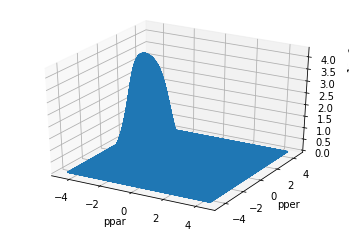

In [7]:
# Plot amplitudes
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(ampsT[0],ampsT[1],ampsT[2]);
plt.xlabel('ppar');
plt.ylabel('pper');

In [8]:
# Integrate perpendicular momenta
pparAmps = []

for i in np.arange(inum+1):
    temp = 0
    for j in np.arange(jnum+1):
        temp += amps[i*(inum+1) + j, 2]*jstep
    
    pparAmps.append([amps[i*(jnum+1),0], temp])

pparAmps = np.array(pparAmps)

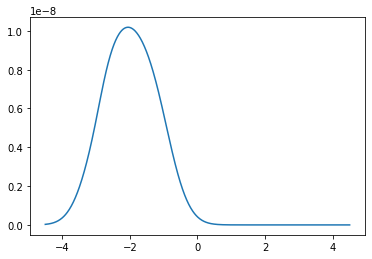

In [9]:
plt.plot(np.transpose(pparAmps)[0], np.transpose(pparAmps)[1]);

# e2

In [10]:
# Import Orbit 1 from CQSFA
# Mre and Mim contain e^iS in complex form, P = |Mre + Mim|^2
e2orb1data = pd.read_csv("/home/geory/git/CQOrbit/Working/Data/Amplitudes_Orb1_Cycle1_Ar_052_800_1e14_7au_120X400.dat", sep = ' ')
entries_e2 = e2orb1data.shape[0]
e2orb1data

,Ppar,Pper,Mre,Mim,P,Mprefre,Mprefim,Ppref
0,0.010000,0.000003,0.165315,-0.062437,0.031228,-0.006614,0.165540,0.027447
1,0.027519,0.000009,-0.001209,0.176338,0.031096,-0.137931,-0.060235,0.022653
2,0.045038,0.000014,-0.031452,0.172742,0.030829,-0.119319,-0.079803,0.020606
3,0.062556,0.000020,0.165752,-0.052636,0.030245,-0.014924,0.138771,0.019480
4,0.080075,0.000025,0.130930,-0.111373,0.029547,0.038481,0.131703,0.018827
...,...,...,...,...,...,...,...,...
95995,-0.002177,6.929920,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95996,-0.002183,6.947440,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000
95997,-0.002188,6.964960,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000
95998,-0.002194,6.982480,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000


In [11]:
# Import Orbit 2 from CQSFA
e2orb2data = pd.read_csv("/home/geory/git/CQOrbit/Working/Data/Amplitudes_Orb2_Cycle1_Ar_052_800_1e14_7au_120X400.dat", sep = ' ')
e2orb2data

,Ppar,Pper,Mre,Mim,P,Mprefre,Mprefim,Ppref
0,0.010000,0.000003,0.036878,0.170252,0.030346,0.215890,0.040301,0.048232
1,0.027519,0.000009,-0.130437,0.089029,0.024940,0.082382,0.318020,0.107924
2,0.045038,0.000014,0.091873,-0.090596,0.016648,-0.077612,-0.112177,0.018607
3,0.062556,0.000020,0.015883,-0.126924,0.016362,-0.112537,-0.025341,0.013307
4,0.080075,0.000025,0.078510,-0.103692,0.016916,-0.082740,-0.069439,0.011668
...,...,...,...,...,...,...,...,...
95995,-0.002177,6.929920,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000
95996,-0.002183,6.947440,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000
95997,-0.002188,6.964960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95998,-0.002194,6.982480,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000


In [12]:
#CQSFA grid is not symmetric, only has one half of of ppar points

parmin = -4.5
parmax = 4.5
parnum = 450

permin = 0.04
permax = 4.5
pernum = 223

parstep = (parmax-parmin)/parnum
perstep = (permax-permin)/pernum

In [13]:
# Sample points and inpterpolation targets

pointse2 = []
for i in np.arange(entries_e2):
    pointse2.append([e2orb1data['Ppar'][i], e2orb1data['Pper'][i]])
    
pointse2 = np.array(pointse2)

targetse2 = []

for i in np.arange(parnum+1):
    for j in np.arange(pernum+1):
        targetse2.append([parmin + i*parstep, permin + j*perstep])

targetse2 = np.array(targetse2)

In [14]:
# Calculate amplitudes from Real and Imaginary components
e2orb1reals = e2orb1data['Mre'].tolist()
e2orb1ims = e2orb1data['Mim'].tolist()

e2orb2reals = e2orb2data['Mre'].tolist()
e2orb2ims = e2orb2data['Mim'].tolist()

e2orb1comp = np.empty_like(e2orb1reals, dtype = np.complex128)
e2orb2comp = np.empty_like(e2orb1reals, dtype = np.complex128)

for i in np.arange(e2orb1comp.size):
    e2orb1comp[i] = complex(e2orb1reals[i], e2orb1ims[i])
    e2orb2comp[i] = complex(e2orb2reals[i], e2orb2ims[i])

In [15]:
e2comp = e2orb1comp + e2orb2comp
e2abs = np.abs(e2comp)**2

In [16]:
interpe2 = scipy.interpolate.griddata(points=pointse2, values=e2abs, xi=targetse2, method='linear')

In [34]:
# List-Array monkey bussiness
interpArraye2 = np.empty_like(interpe2, dtype = np.ndarray)

for i in np.arange((parnum+1)*(pernum+1)):
    elem = np.append(targetse2[i], interpe2[i])
    interpArraye2[i] = elem
    
interpArraye2 = interpArraye2.tolist()

for i in np.arange(len(interpArraye2)):
    interpArraye2[i] = interpArraye2[i].tolist()
    
interpArraye2 = np.array(interpArraye2)
transe2 = np.transpose(interpArraye2)

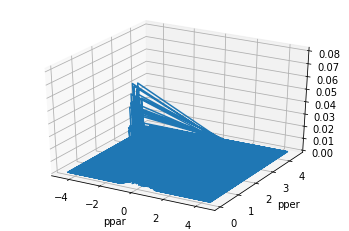

In [35]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(transe2[0],transe2[1],transe2[2]);
plt.xlabel('ppar');
plt.ylabel('pper');

In [36]:
# Integrate perpendicular components
pparAmpse2 = []

for i in np.arange(parnum+1):
    temp = 0
    for j in np.arange(pernum+1):
        temp += interpArraye2[i*(pernum+1) + j, 2]*perstep
    
    pparAmpse2.append([interpArraye2[i*(pernum+1),0], temp])

pparAmpse2 = np.array(pparAmpse2)

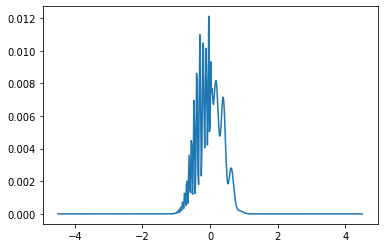

In [37]:
plt.plot(np.transpose(pparAmpse2)[0], np.transpose(pparAmpse2)[1])

In [38]:
# Construct grid of total amplitudes as a function of ppar1 and ppar2
ampGrid = np.empty((pparAmps.shape[0], pparAmpse2.shape[0]), dtype = np.ndarray)

for par1 in np.arange(pparAmps.shape[0]):
    for par2 in np.arange(pparAmpse2.shape[0]):
        ampGrid[par1, par2] = np.array([pparAmps[par1,0], pparAmpse2[par2,0], pparAmps[par1,1]*pparAmpse2[par2,1]])

In [39]:
listg = ampGrid.tolist()

for i in np.arange(len(listg)):
    for j in np.arange(len(listg[0])):
        listg[i][j] = listg[i][j].tolist()
        
grid = np.array(listg)

finalAmps = grid[0]

for i in np.arange(grid.shape[0]):
    if(i != 0):
        finalAmps = np.append(finalAmps, grid[i], axis=0)

In [40]:
finalAmps

array([[-4.50000000e+000, -4.50000000e+000,  1.50745004e-158],
       [-4.50000000e+000, -4.48000000e+000,  3.82132433e-157],
       [-4.50000000e+000, -4.46000000e+000,  1.74692880e-155],
       ...,
       [ 4.50000000e+000,  4.46000000e+000,  4.94816640e-172],
       [ 4.50000000e+000,  4.48000000e+000,  1.12040166e-173],
       [ 4.50000000e+000,  4.50000000e+000,  2.43214894e-175]])

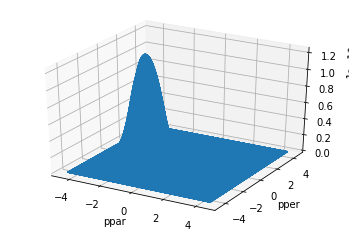

In [41]:
p1 = np.transpose(finalAmps)[0]
p2 = np.transpose(finalAmps)[1]
val = np.transpose(finalAmps)[2]

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(p1,p2,val);
plt.xlabel('ppar');
plt.ylabel('pper');

In [42]:
# Save result to text file to plot with Mathematica
# Puts file in parent folder of notebook

np.savetxt('HiRes_Frank_orb1_5au.txt', finalAmps)

In [43]:
#Symmetrising

sym = np.copy(finalAmps)

for i in np.arange(parnum+1):
    for j in np.arange(parnum+1):
        sym[i*(parnum+1)+j][2] = finalAmps[i*(parnum+1)+j][2] + finalAmps[j*(parnum+1)+i][2]

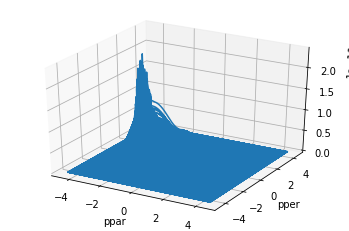

In [44]:
p1 = np.transpose(sym)[0]
p2 = np.transpose(sym)[1]
val = np.transpose(sym)[2]

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(p1,p2,val);
plt.xlabel('ppar');
plt.ylabel('pper');

In [45]:
np.savetxt('HiRes_Frank_orb1_sym_5au.txt', sym)